In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Social_Network_Ads.csv')

In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data.shape

(400, 5)

In [6]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
X = data.iloc[:,[2,3]]
Y = data.iloc[:,4]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3, random_state=0)

In [9]:
# feature Scaling

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

In [10]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,Y_train)
pred_y = classifier.predict(X_test)

In [11]:
# model Evaluation

accuracy = classifier.score(X_test,Y_test)
print(accuracy)

0.8916666666666667


In [14]:
# Confusion Matrix

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(Y_test,pred_y)

In [13]:
cm

array([[73,  6],
       [ 7, 34]], dtype=int64)

In [15]:
# Accuracy score

print("Accuracy:\n")
accuracy_score(Y_test,pred_y)

Accuracy:



0.8916666666666667

In [16]:
#Classification report

print("Classification Report:\n")
print(classification_report(Y_test,pred_y))

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.92      0.92        79
           1       0.85      0.83      0.84        41

    accuracy                           0.89       120
   macro avg       0.88      0.88      0.88       120
weighted avg       0.89      0.89      0.89       120



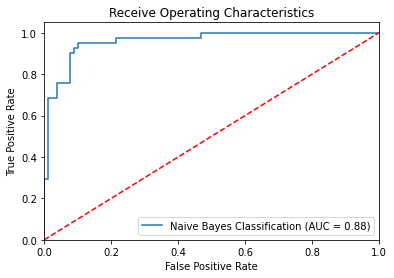

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Area_Under_Curve = roc_auc_score(Y_test, pred_y)
fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'Naive Bayes Classification (AUC = %0.2f)' % Area_Under_Curve)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive Operating Characteristics")
plt.legend(loc="lower right")
plt.show()

# Happy Learning 